In this notebook, we will view the high temperatures in Sitka, Alaska for the month of July 2018.

Let us import the required libraries and file into a DataFrame.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_07-2018_simple.csv'
sitka_weather = pd.read_csv(filename)

Let us view the first five days of weather.

In [18]:
sitka_weather.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00025333,"SITKA AIRPORT, AK US",2018-07-01,0.25,NaN,62,50
1,USW00025333,"SITKA AIRPORT, AK US",2018-07-02,0.01,NaN,58,53
2,USW00025333,"SITKA AIRPORT, AK US",2018-07-03,0.00,NaN,70,54
3,USW00025333,"SITKA AIRPORT, AK US",2018-07-04,0.00,NaN,70,55
4,USW00025333,"SITKA AIRPORT, AK US",2018-07-05,0.00,NaN,67,55


Focusing on highs...

In [19]:
sitka_weather['TMAX'].head()

0    62
1    58
2    70
3    70
4    67
Name: TMAX, dtype: int64

Let us now plot the maximum temperature for each day to see the trend.

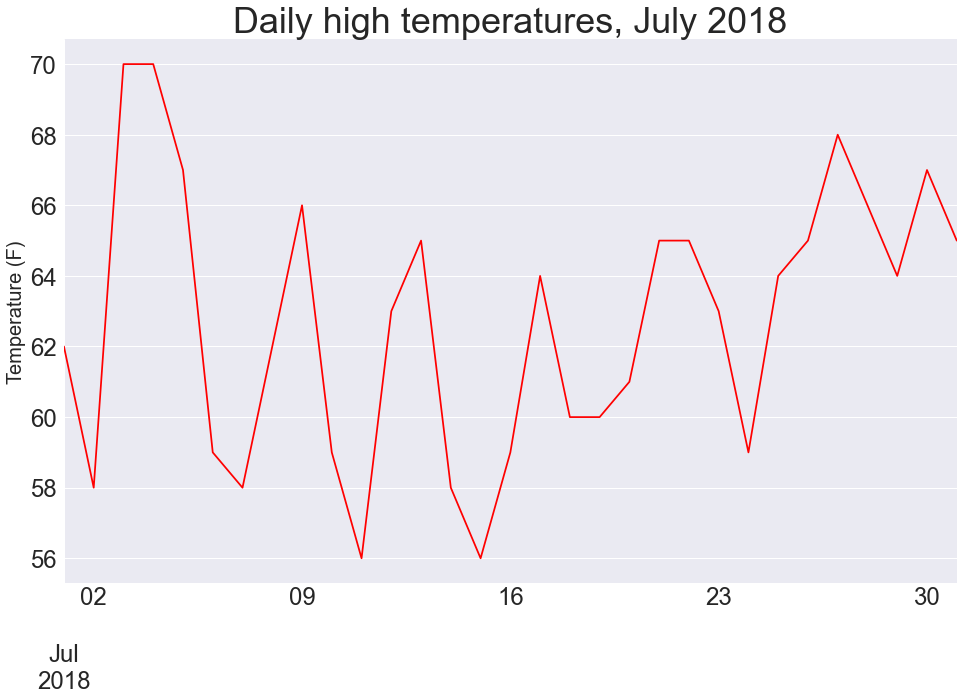

In [20]:
# Format date column from string type to datetime type.
sitka_weather.loc[:, 'DATE'] = pd.to_datetime(sitka_weather.loc[:, 'DATE'],
                                              format='%Y-%m-%d')
# Plot the high temperatures by date.
plt.style.use('seaborn')
sitka_weather.set_index('DATE').loc[:, 'TMAX'].plot(c='red', figsize=(16, 10))

# Format plot.
plt.title("Daily high temperatures, July 2018", fontsize=36)
plt.xlabel('', fontsize=20)
plt.ylabel('Temperature (F)', fontsize=20)
plt.tick_params(axis='both', which='both', labelsize=24)

# Display plot.
plt.show()

It can be seen that the maximum temperature appears to reach its peak about every 5 days.

Let us now view the entire year's high temperatures in Sitka.

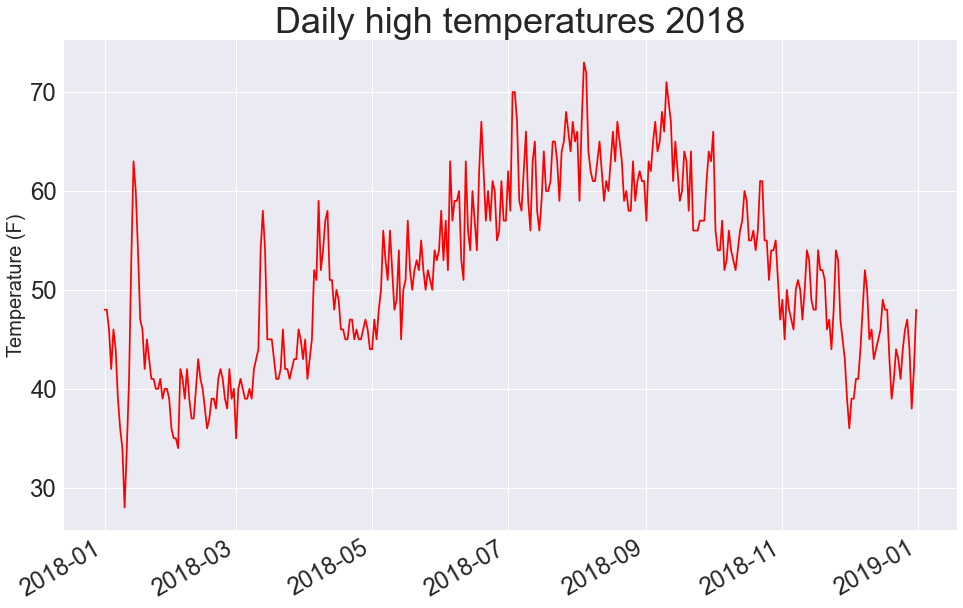

In [21]:
# Loading file into DataFrame.
filename = 'data/sitka_weather_2018_simple.csv'
sitka_weather = pd.read_csv(filename)


# Format date column from string type to datetime type.
sitka_weather.loc[:, 'DATE'] = pd.to_datetime(sitka_weather.loc[:, 'DATE'],
                                              format='%Y-%m-%d')
# Plot the high temperatures by date.
plt.style.use('seaborn')
sitka_weather.set_index('DATE').loc[:, 'TMAX'].plot(c='red', figsize=(16, 10))

# Format plot.
plt.title("Daily high temperatures 2018", fontsize=36)
plt.xlabel('', fontsize=20)
plt.ylabel('Temperature (F)', fontsize=20)
plt.tick_params(axis='both', which='both', labelsize=24)

# Display plot.
plt.show()

Two things are of note here.

One is that the general maximum temperature rises during the summer months and dips during the winter months.

The second is that now and then there is a sudden spike and dip in maximum temperature which could be attributed to
weather cyles. More data needs to be analyzed to confirm this prediction.

Let us see if there is a correlation between precipitation and maximum temperature.

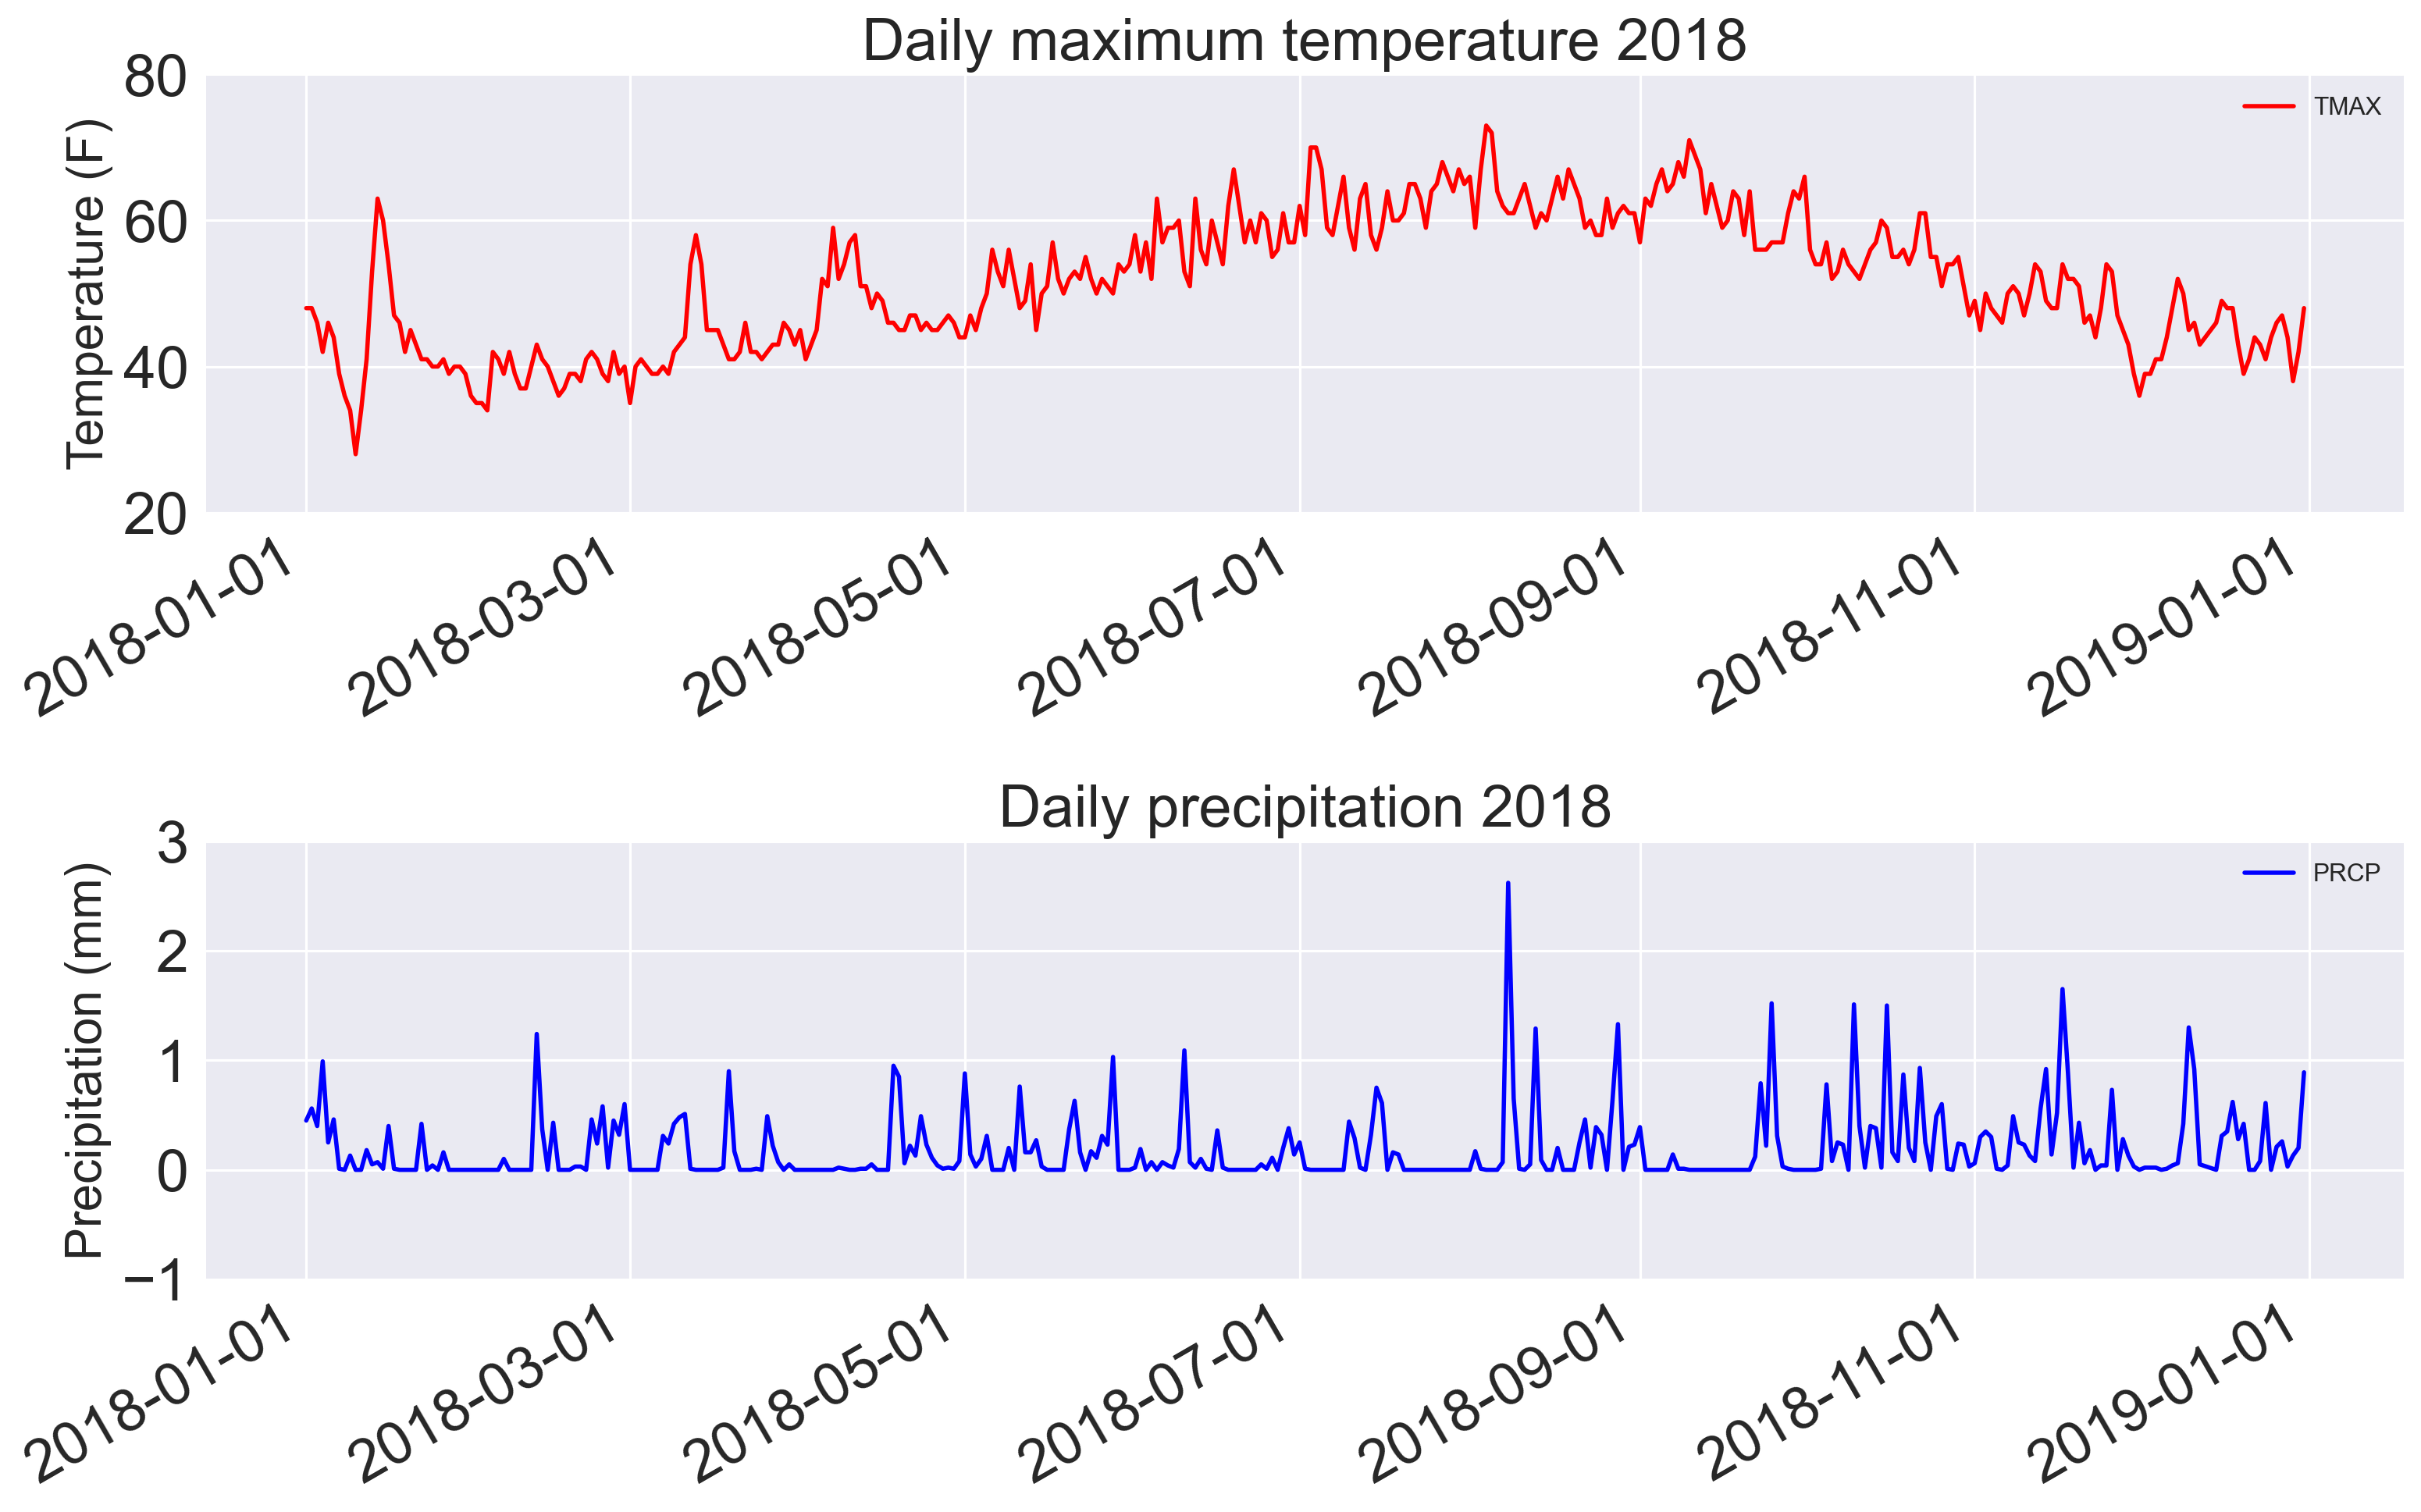

<Figure size 3632x2270 with 0 Axes>

In [33]:
# Plot high temperature and precipitation by date.

fig, (max_temp_plot, prcp_plot) = plt.subplots(nrows=2, ncols=1, figsize=(16, 10), dpi=227)
plt.figure(figsize=(16, 10), dpi=227)
fig.subplots_adjust(hspace=0.75)

sitka_weather.plot(ax=max_temp_plot, x='DATE', y='TMAX', c='red')
sitka_weather.plot(ax=prcp_plot, x='DATE', y='PRCP', c='blue')

# Format plot.
max_temp_plot.set_title("Daily maximum temperature 2018", fontsize=24)
prcp_plot.set_title("Daily precipitation 2018", fontsize=24)

max_temp_plot.set_xlabel('', fontsize=20)
prcp_plot.set_xlabel('', fontsize=20)

max_temp_plot.set_ylabel('Temperature (F)', fontsize=20)
prcp_plot.set_ylabel('Precipitation (mm)', fontsize=20)

max_temp_plot.tick_params(axis='both', which='both', labelsize=24)
prcp_plot.tick_params(axis='both', which='both', labelsize=24)

# Scale the axes so most ticks appear.
max_temp_plot.set_xticks(max_temp_plot.get_xticks()[::1])
prcp_plot.set_xticks(prcp_plot.get_xticks()[::1])

max_temp_plot.set_yticks(max_temp_plot.get_yticks()[::1])
prcp_plot.set_yticks(prcp_plot.get_yticks()[::1])

There does not visually appear to be any strong correlation of sorts. However, closer
inspection reveals that when there is a dip in maximum temperature there is
always minimum precipitation and when maximum temperature peaks, there is some
precipitation.